In [1]:
# Import essential libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [3]:
# Load the dataset
file_path = '/content/Fraudulent_E-Commerce_Transaction_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print("First 5 Rows of the Dataset:")
print(data.head())

# Get dataset summary to check column data types and missing values
print("\nDataset Information:")
print(data.info())

# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Get statistical summary of the dataset
print("\nStatistical Summary:")
print(data.describe())

First 5 Rows of the Dataset:
                         Transaction ID                           Customer ID  \
0  15d2e414-8735-46fc-9e02-80b472b2580f  d1b87f62-51b2-493b-ad6a-77e0fe13e785   
1  0bfee1a0-6d5e-40da-a446-d04e73b1b177  37de64d5-e901-4a56-9ea0-af0c24c069cf   
2  e588eef4-b754-468e-9d90-d0e0abfc1af0  1bac88d6-4b22-409a-a06b-425119c57225   
3  4de46e52-60c3-49d9-be39-636681009789  2357c76e-9253-4ceb-b44e-ef4b71cb7d4d   
4  074a76de-fe2d-443e-a00c-f044cdb68e21  45071bc5-9588-43ea-8093-023caec8ea1c   

   Transaction Amount     Transaction Date Payment Method Product Category  \
0               58.09  2024-02-20 05:58:41  bank transfer      electronics   
1              389.96  2024-02-25 08:09:45     debit card      electronics   
2              134.19  2024-03-18 03:42:55         PayPal    home & garden   
3              226.17  2024-03-16 20:41:31  bank transfer         clothing   
4              121.53  2024-01-15 05:08:17  bank transfer         clothing   

   Quantity  Cu

In [4]:
# Check how many rows have missing values
print("Rows with Missing Values:")
print(data[data.isnull().any(axis=1)])

# Drop rows with missing values
data = data.dropna()

# Confirm there are no more missing values
print("\nMissing Values After Cleaning:")
print(data.isnull().sum())


Rows with Missing Values:
Empty DataFrame
Columns: [Transaction ID, Customer ID, Transaction Amount, Transaction Date, Payment Method, Product Category, Quantity, Customer Age, Customer Location, Device Used, IP Address, Shipping Address, Billing Address, Is Fraudulent, Account Age Days, Transaction Hour]
Index: []

Missing Values After Cleaning:
Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64


In [5]:
# Fix negative values in `Customer Age` (set to NaN or absolute values)
data['Customer Age'] = data['Customer Age'].apply(lambda x: np.nan if x < 0 else x)

# Handle any resulting NaN values in `Customer Age`
data['Customer Age'].fillna(data['Customer Age'].median(), inplace=True)

# Convert `Transaction Date` to datetime
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

# Drop irrelevant columns for fraud detection
data = data.drop(columns=['Transaction ID', 'Customer ID', 'IP Address',
                          'Shipping Address', 'Billing Address'])

# Display the first few rows after cleaning
print("First Few Rows After Cleaning:")
print(data.head())


<ipython-input-5-ecf4750a2cb4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Customer Age'].fillna(data['Customer Age'].median(), inplace=True)


First Few Rows After Cleaning:
   Transaction Amount    Transaction Date Payment Method Product Category  \
0               58.09 2024-02-20 05:58:41  bank transfer      electronics   
1              389.96 2024-02-25 08:09:45     debit card      electronics   
2              134.19 2024-03-18 03:42:55         PayPal    home & garden   
3              226.17 2024-03-16 20:41:31  bank transfer         clothing   
4              121.53 2024-01-15 05:08:17  bank transfer         clothing   

   Quantity  Customer Age Customer Location Device Used  Is Fraudulent  \
0         1          17.0     Amandaborough      tablet              0   
1         2          40.0      East Timothy     desktop              0   
2         2          22.0        Davismouth      tablet              0   
3         5          31.0          Lynnberg     desktop              0   
4         2          51.0      South Nicole      tablet              0   

   Account Age Days  Transaction Hour  
0                30  

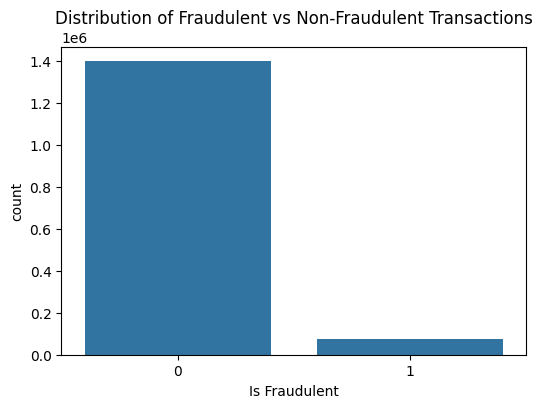

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of `Is Fraudulent`
plt.figure(figsize=(6, 4))
sns.countplot(x='Is Fraudulent', data=data)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()


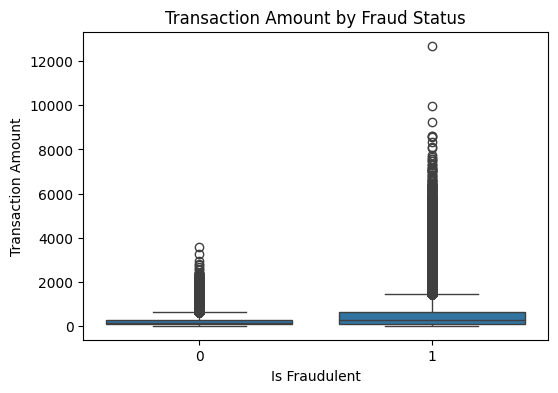

In [7]:

# Transaction Amount Distribution
plt.figure(figsize=(6, 4))
sns.boxplot(x='Is Fraudulent', y='Transaction Amount', data=data)
plt.title('Transaction Amount by Fraud Status')
plt.show()


<ipython-input-8-469881d58f50>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Payment Method', y='Is Fraudulent', data=data, ci=None)


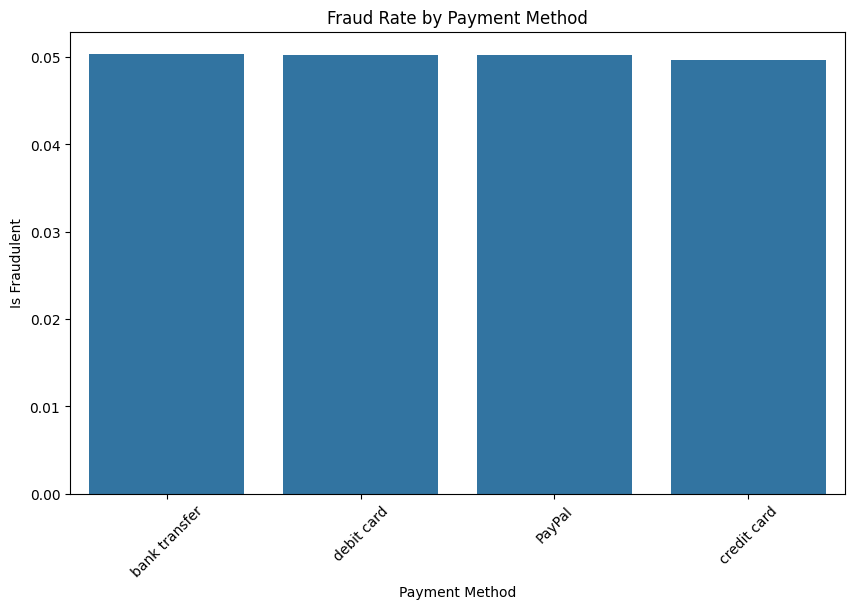

In [8]:

# Fraud Rate by Payment Method
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment Method', y='Is Fraudulent', data=data, ci=None)
plt.title('Fraud Rate by Payment Method')
plt.xticks(rotation=45)
plt.show()


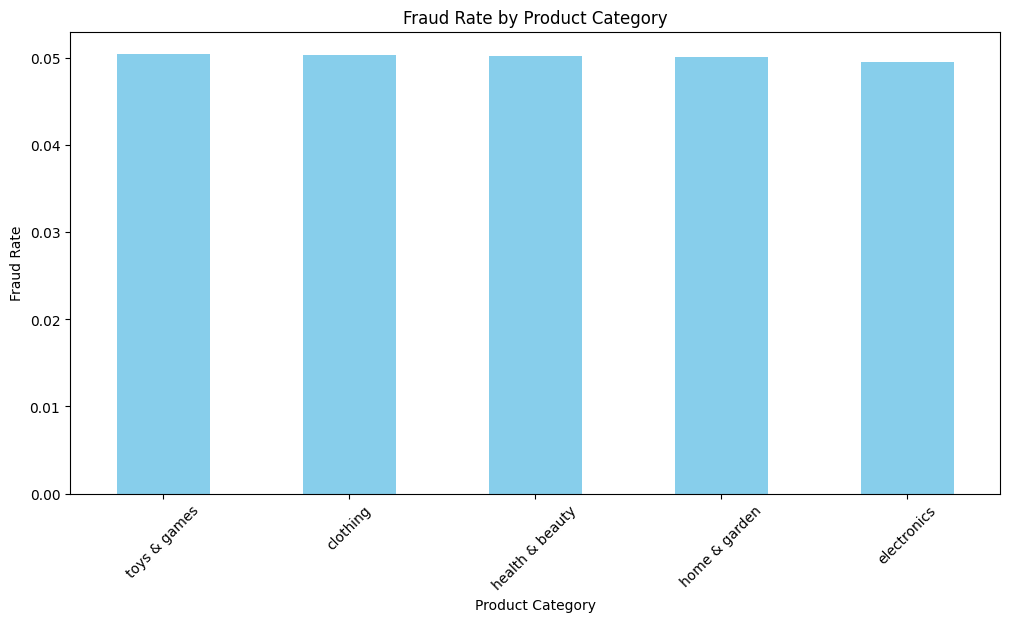

In [9]:
# Fraud Rate by Product Category
plt.figure(figsize=(12, 6))
fraud_rate_by_category = data.groupby('Product Category')['Is Fraudulent'].mean().sort_values(ascending=False)
fraud_rate_by_category.plot(kind='bar', color='skyblue')
plt.title('Fraud Rate by Product Category')
plt.ylabel('Fraud Rate')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()


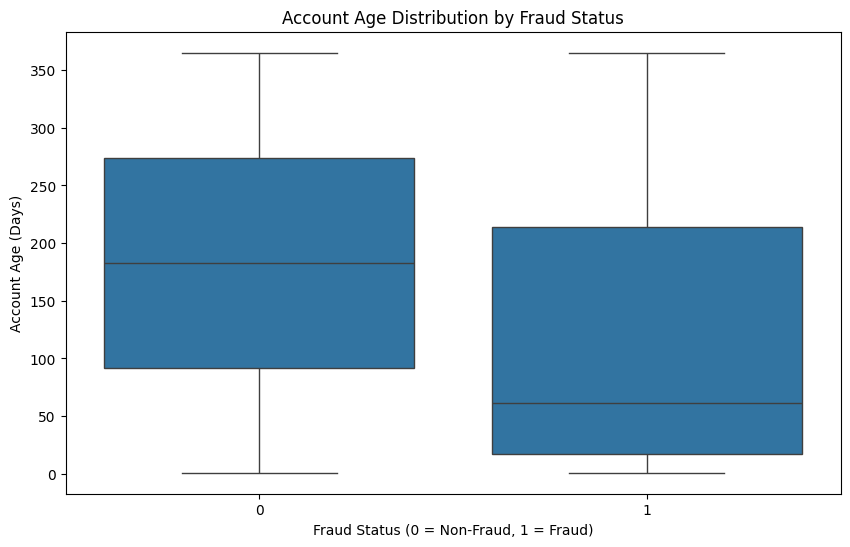

In [10]:
# Account Age Distribution by Fraud Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is Fraudulent', y=data['Account Age Days'], data=data)
plt.title('Account Age Distribution by Fraud Status')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Account Age (Days)')
plt.show()


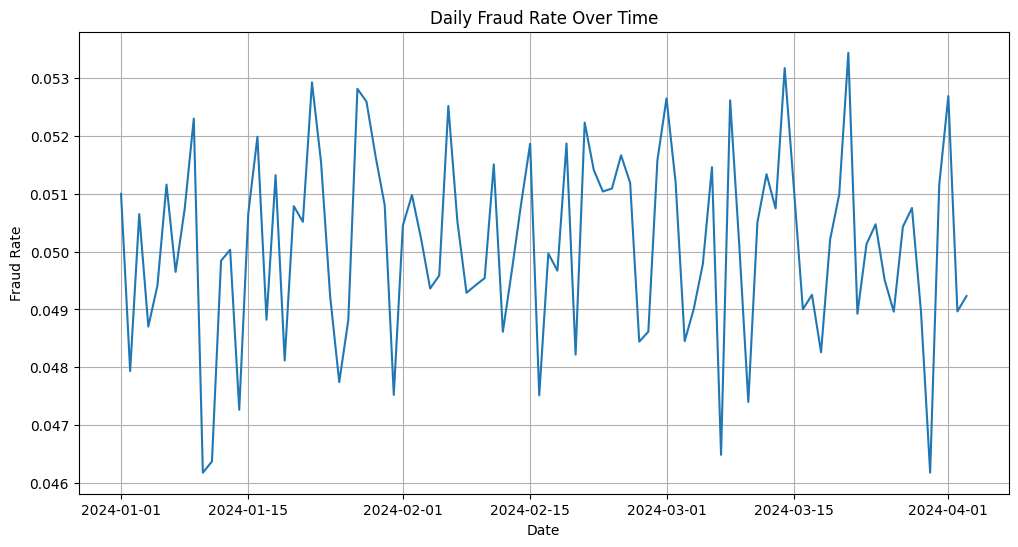

In [11]:
# Group by Date to Calculate Daily Fraud Rate
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])
data['Transaction Date Only'] = data['Transaction Date'].dt.date
daily_fraud_rate = data.groupby('Transaction Date Only')['Is Fraudulent'].mean()

plt.figure(figsize=(12, 6))
daily_fraud_rate.plot()
plt.title('Daily Fraud Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Fraud Rate')
plt.grid()
plt.show()


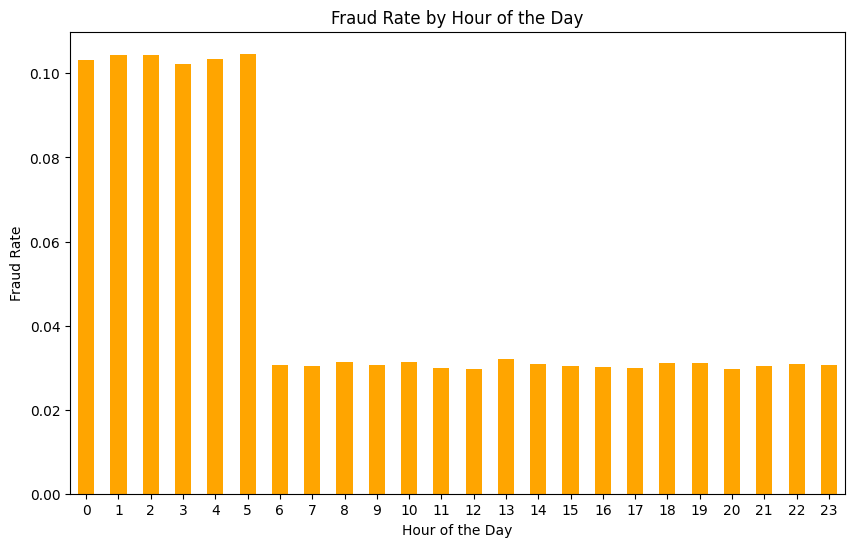

In [12]:
# Fraud Rate by Hour of the Day
hourly_fraud_rate = data.groupby('Transaction Hour')['Is Fraudulent'].mean()

plt.figure(figsize=(10, 6))
hourly_fraud_rate.plot(kind='bar', color='orange')
plt.title('Fraud Rate by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=0)
plt.show()


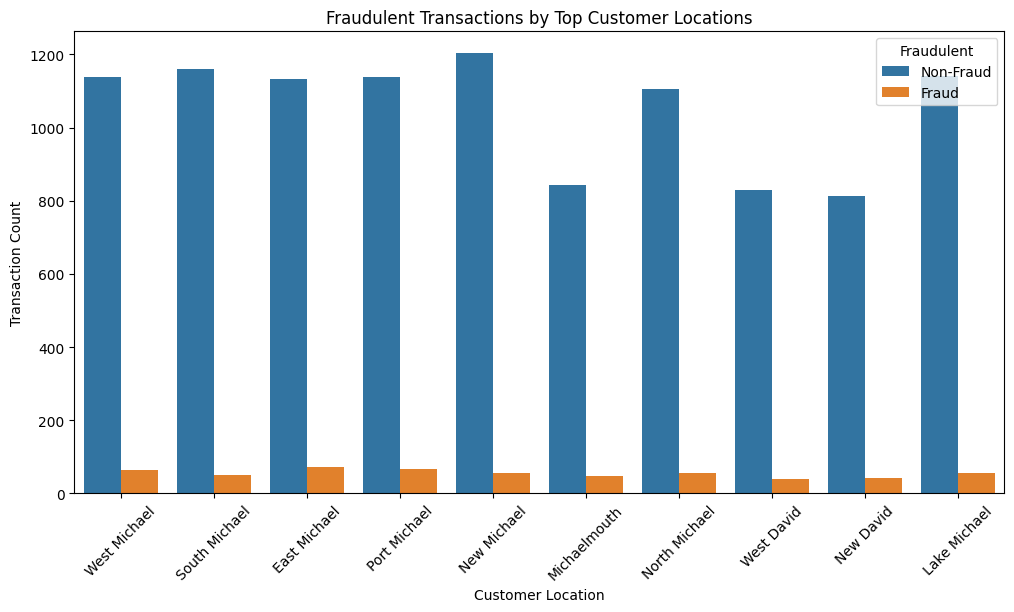

In [13]:
# Fraud Count by Customer Location
top_locations = data['Customer Location'].value_counts().head(10).index
filtered_data = data[data['Customer Location'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Customer Location', hue='Is Fraudulent', data=filtered_data)
plt.title('Fraudulent Transactions by Top Customer Locations')
plt.xlabel('Customer Location')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent', loc='upper right', labels=['Non-Fraud', 'Fraud'])
plt.show()


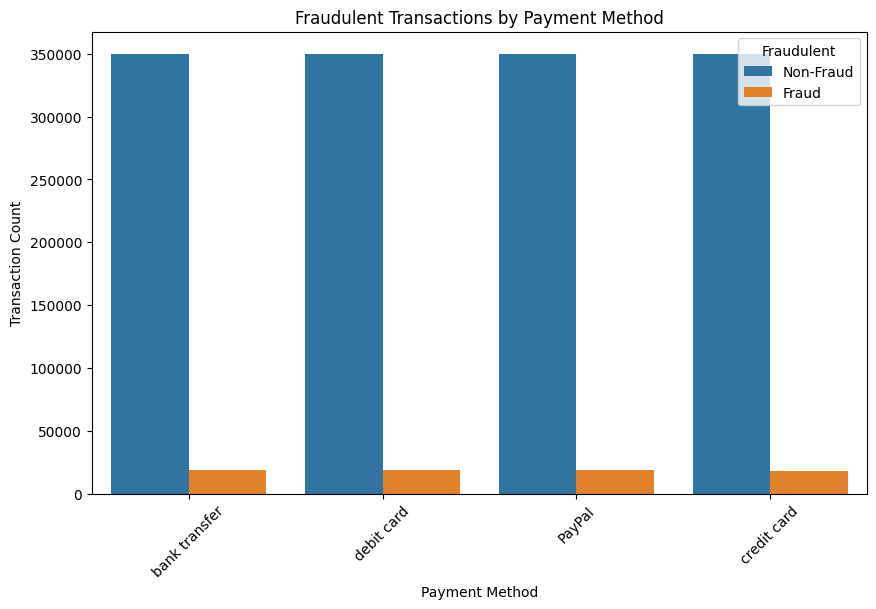

In [14]:
# Fraudulent Transactions by Payment Method
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', hue='Is Fraudulent', data=data)
plt.title('Fraudulent Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent', loc='upper right', labels=['Non-Fraud', 'Fraud'])
plt.show()


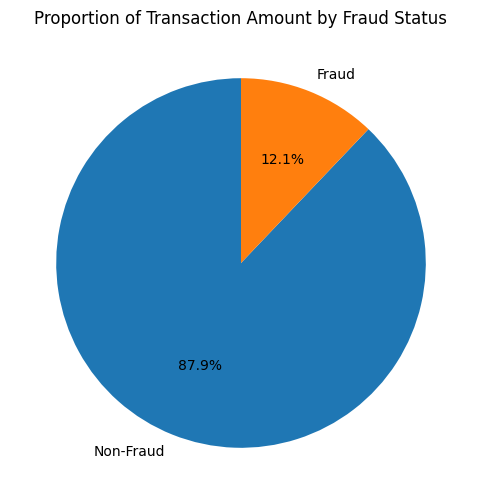

In [15]:
# Total Transaction Amount Proportion
fraud_amount = data.groupby('Is Fraudulent')['Transaction Amount'].sum()

plt.figure(figsize=(6, 6))
fraud_amount.plot(kind='pie', labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Transaction Amount by Fraud Status')
plt.ylabel('')
plt.show()


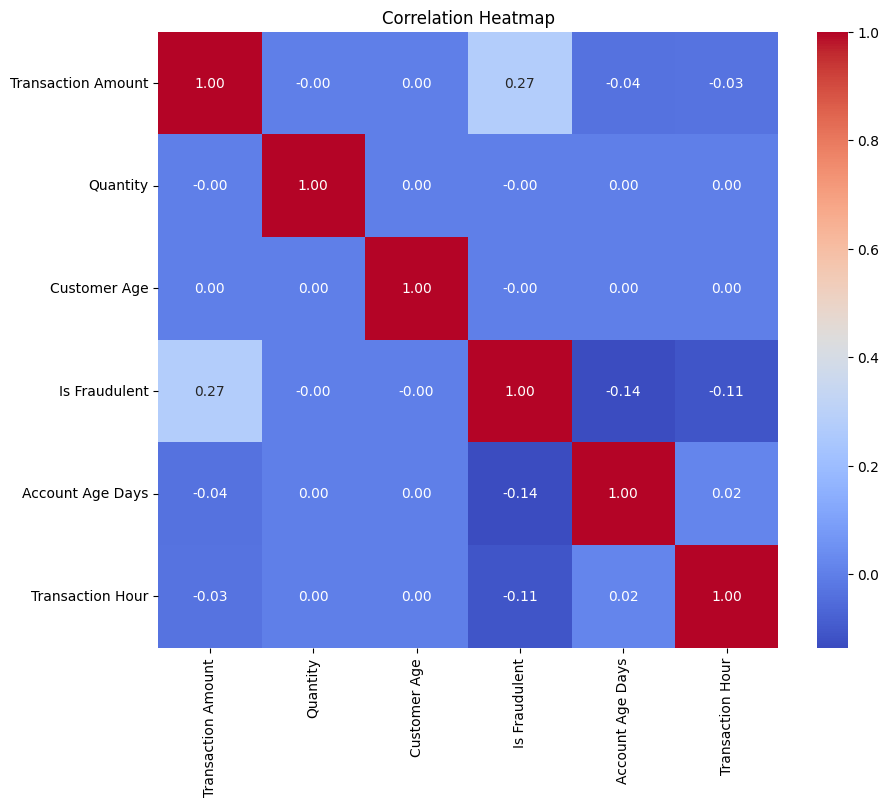

In [16]:
# Correlation Heatmap
numeric_data = data.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [17]:
# Separate features and target
X = data.drop(columns=['Is Fraudulent', 'Transaction Date', 'Transaction Date Only'])
y = data['Is Fraudulent']

# Display the dimensions of X and y
print("Feature Matrix Shape (X):", X.shape)
print("Target Variable Shape (y):", y.shape)


Feature Matrix Shape (X): (1472952, 9)
Target Variable Shape (y): (1472952,)


In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Display the shape after label encoding
print("Feature Matrix Shape After Label Encoding:", X.shape)


Feature Matrix Shape After Label Encoding: (1472952, 9)


In [19]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of training and testing sets
print("Training Set Size (X_train):", X_train.shape)
print("Test Set Size (X_test):", X_test.shape)


Training Set Size (X_train): (1178361, 9)
Test Set Size (X_test): (294591, 9)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred))
print("Logistic Regression - ROC AUC Score:", roc_auc_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.87      0.11      0.20     14762

    accuracy                           0.95    294591
   macro avg       0.91      0.56      0.59    294591
weighted avg       0.95      0.95      0.94    294591

Logistic Regression - ROC AUC Score: 0.5559855404348256


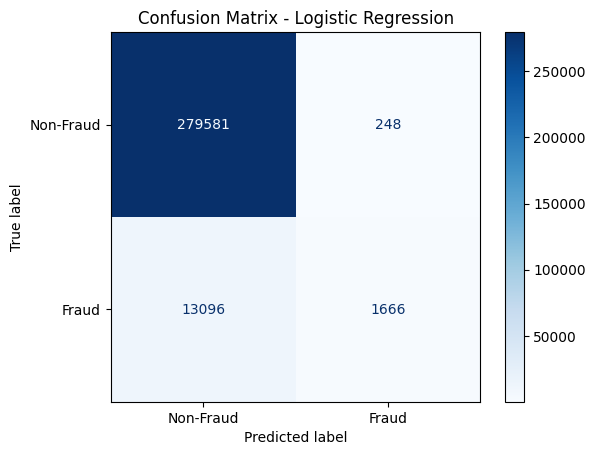

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


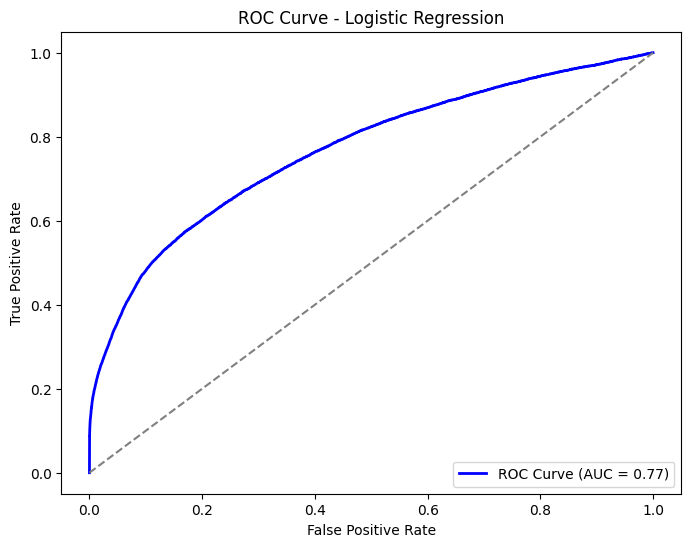

In [22]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()


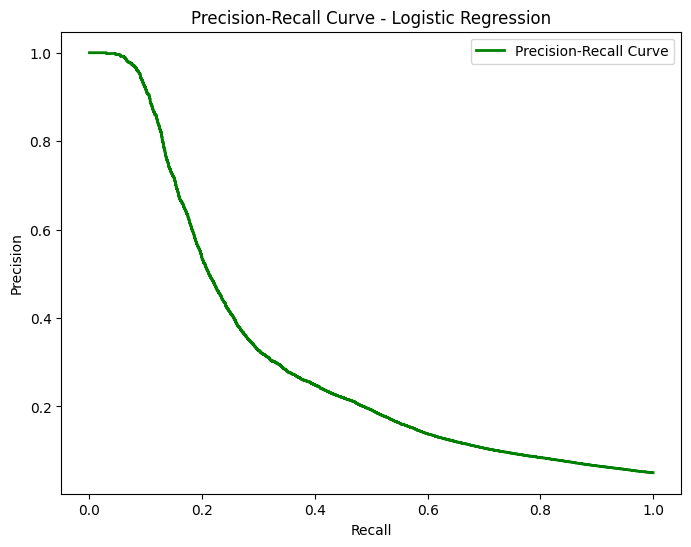

In [23]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, log_reg.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.legend(loc="upper right")
plt.show()


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest - ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.76      0.16      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.86      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Random Forest - ROC AUC Score: 0.5762400713861556


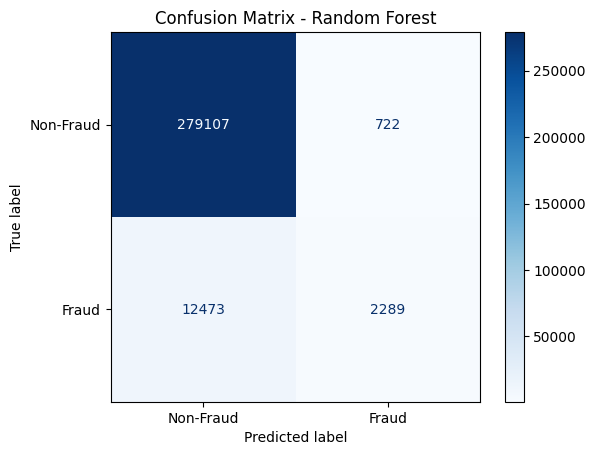

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()


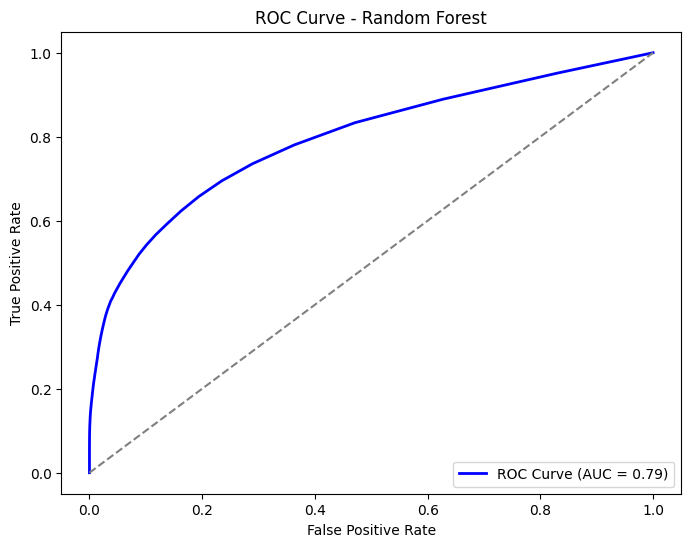

In [26]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()


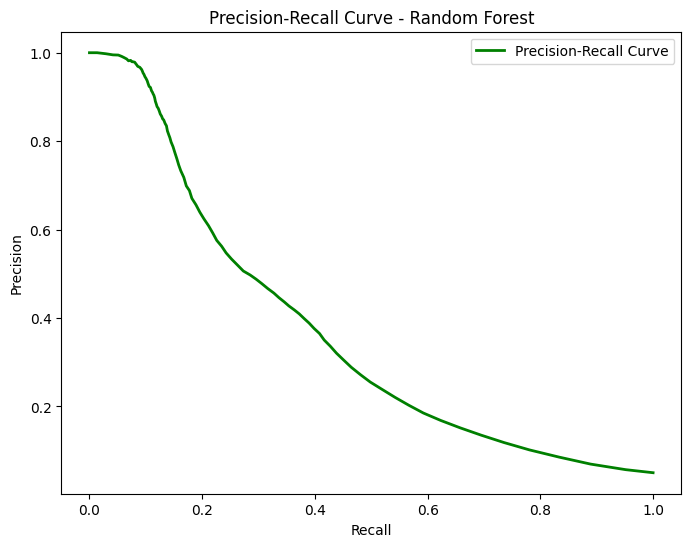

In [27]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.legend(loc="upper right")
plt.show()


In [28]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree - ROC AUC Score:", roc_auc_score(y_test, y_pred_dt))


Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    279829
           1       0.21      0.26      0.23     14762

    accuracy                           0.92    294591
   macro avg       0.59      0.60      0.59    294591
weighted avg       0.92      0.92      0.92    294591

Decision Tree - ROC AUC Score: 0.603055700256031


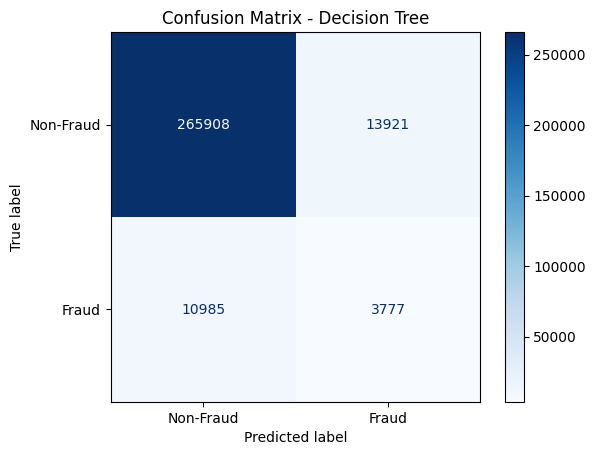

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


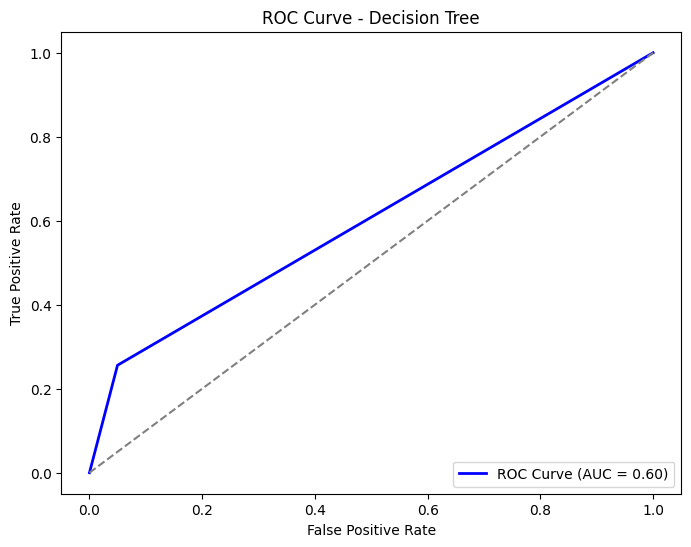

In [30]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.show()


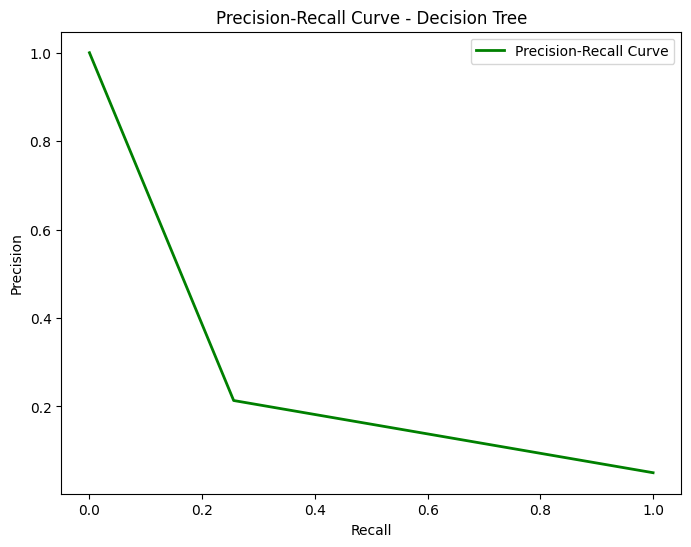

In [31]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, dt_model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Decision Tree")
plt.legend(loc="upper right")
plt.show()
